# Wprowadzenie



Tu zajmiemy się automatyzacją procesu budowania sieci i jej szkolenia z pomocą biblioteki Keras, co bardzo ułatwia prowadzenie eksperymentów.

In [ ]:
import tensorflow as tf
import tensorflow.keras as krs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Wczytanie danych

Przez część tego notebooka będziemy pracować ze zbiorem danych znanym z poprzedniego modułu. Będzie można łatwo porównać wyniki działania sieci oraz złożoność procesu jej uczenia.

In [ ]:
#wczytać plik

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,y
0,1.782902,-0.514597,-0.613121,1.887671,0.882484,-0.710170,-1.012459,1.844640,-1.467145,-1.988939,1
1,0.954982,-1.424915,0.892841,-0.823253,-0.518931,-0.122799,-0.731305,2.180099,-2.912802,-0.134576,0
2,0.442498,1.101695,0.876030,0.599936,-1.822219,0.097915,1.885007,-2.298382,1.596145,0.396029,1


In [ ]:
X, y = data.drop(columns=['y']), data.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

# Budowanie sieci w Keras

Proces budowania sieci w Keras-ie składa się z kilku kroków:

1. Utworzeie modelu i dodawanie do niego kolejnych warstw o określonej specyfikacji.
2. Dodanie funkcji kosztu, optymalizaotra i metryk.
3. Dodanie ew. dodatków jak wywołania zwrotne (ang. *callback*)  - jak np. przerywanie uczenia gdy trafność spada, etc.
4. Skompilowanie modelu.


### Ad 1. - tworzenie modelu i dodawanie warstw

Istnieje szereg warstw sieci, które można wykorzystać:

1. **Warstwy "gęste" (ang. *dense*)** - taki rodzaj warstw, z jakimi zwykle mamy do czynienia. W pełni połączone z wejściami i wyjściami. Musimy podać:
    * liczbę neuronów
    * aktywację

```{python}
model.add( keras.layers.Dense(# neurons, activation) )
```
Ta warstwa wykona mnożenie wag, **dokładnie tak** jak robiliśmy to w kodzie pisanym "ręcznie": (X * W + b) - warstwa alokuje wagi (W) oraz biasy (b).
W przypadku **pierwszej warstwy** trzeba podać wymiarowość danych wejścowych, tzn. ile cech posiadają dane.

2. **Dropout** - "warstwa" odpowiadająca za losowe wyłączanie neuronów w procesie uczenia (tak, jak to pokazano na wykładach).
3. **Batch notmalization** - warstwa odpowiadająca za adaptacyjną normalizację wejść do sieci.
4. **Conv1D, Conv2D, etc.** - warstwy konwolucyjne, o których będzie mowa później.
5. **LSTM,RNN, GRU, etc.** - warstwy rekurencyjne, o których będzie mowa później.

### Ad. 2. & Ad. 4. - dodanie funkcji kosztu, optymalizatora i metryk / kompilacja modelu

Każdą funkcję kosztu, albo optymalizator lub metrykę, można dodać za pomocą tekstu (string) albo przekazać obiekt odpowiedniego typu. Tekstami można się posługiwać w relatywnie prostych przypadkach, gdy używamy elementów wchodzących w skład biblioteki. Obiekty można przekazywać, gdy używamy niestandardowych rozwiazań.

Przykład wykorzystania tekstu w kompilacji modelu:

```
model.compile(
    optimizer='adam',
    loss='binary_cross_entropy',
    metrics=['accuracy', 'precision'])
```

Przykład wykorzystania obiektów

```
model.compile(
    optimizer=krs.optimizers.Adam(),
    loss=krs.losses.BinaryCrossentropy(),
    metrics=[krs.metrics.Accuracy(), krs.metrics.Precision()])
```

### Ad 3. - Dodanie ew. dodatków jak wywołania zwrotne

Ten element będzie częścią dalszych ćwiczeń.




Samo dodawanie warstw można zrobić na dwa, uzupełniające się sposoby, które omówimy i przećwiczymy dalej.

# Sposób sekwencyjny

Jest to prostszy sposób, polegający na:

1. Utworzeniu pustego obiektu modelu.

```
model = keras.models.Sequential()
```

2. Dodawnie do niego kolejnych warstw, w naszym przypadku typu `Dense`, podając liczbę neuronów i aktywację.
3. Na koniec dodajemy optymalizator, funkcje kosztu, itp.

Ten sposób jest dobry dla relatywnie prostych modeli z jednym wejściem i jednym wyjściem.

Przykład:

```
model = krs.models.Sequential()
model.add(krs.layers.Dense(# neurons, 'activation', input_shape=(...,))   # pierwsza warstwa z podaniem wymiarowości danych wejściowych
model.add(krs.layers.Dense(# neurons, 'activation'))                      # druga warstwa
...
model.add(krs.layers.Dense(# neurons, 'activation'))                      # ostatnia warstwa
model.compile(... dodatki... )
```

<div class='alert alert-block alert-warning'>
    <b>Zadanie</b>: Zbuduj model metodą sekwencyjną. Model powininen posiadać:
    <ol>
        <li>Pierwszą warstwę ukrytą z 8 neuronami oraz aktywacją ReLU. Podaj wymiarowość danych wejściowych w formacie <code>input_shape=(# features,)</code></li>
        <li>Drugą i ostatnią warstwę z 1 neuronem wyjściowym i aktywacją Sigmoid</li>
        <li>Optymalizator Adam</li>
        <li>Funkcja kosztu <i>binary_crossentropy</i></li>
        <li>Metryki <i>accuracy</i></li>
    </ol>
    Na koniec - wyświetl strukturę modelu funkcją <code>model.summary()</code>
</div>

In [ ]:
###???

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Sprawdzenie poprawności wyniku:

In [ ]:
assert model1.count_params() == 97
assert model1.layers[0].input_shape == (None, 10)
assert model1.layers[0].weights[0].shape == (10, 8)
assert model1.layers[0].activation == krs.activations.relu

assert model1.layers[1].weights[0].shape == (8, 1)
assert model1.layers[1].activation == krs.activations.sigmoid

<div class='alert alert-block alert-info'>
    Zwróć uwagę, przy sprawdzeniu poprawności wyniku powyżej, jak wyglądają kształty wag w sieci. Powinny być zgodne z intuicją i wymiarowością.
</div>

# Sposób funkcyjny

Budując sieć w sposób funkcyjny, mamy większą elastycznosć w sposobie jej kształtowania. Przykładowo możemy:

1. Stworzyć sieć z wieloma wejściami.
2. Dodawać warstwy, które przyjmują jako wejścia elementy z rożnych miejsc sieci (poprzednie warstwy, input, etc.)
3. Łączyć ze sobą warstwy poprzez konkatenację, iloczyny itp.

W podejściu funkcyjnym tworzymy kolejne warstwy, jako funkcję, warstw poprzednich - warstwa jest "funkcją" wywoływaną na poprzedniej warstwie. W tm przypadku również wejście do sieci jest osobnym rodzajem warstwy: `krs.layers.Input(shape=(..., ))`

Pozostałe elementy zostają tak samo, jak było.

Przykładowo, sieć z poprzedniego przykładu wyglądałaby mniej-więcej tak:

```
inp = krs.layers.Input(shape=(..., ))
h1 = krs.layers.Dense(# neurons, activation)(inp)
h2 = krs.layers.Dense(# neurons, activation)(h1)
...
hn = krs.layers.Dense(# neurons, activation)( ... )
yhat = krs.layers.Dense(# neurons, activation)(hn)

model = krs.layers.Model(inputs=inp, outputs=hn)
model.compile(... dodatki ...)

```


<div class='alert alert-block alert-warning'>
    <b>Zadanie</b>: Zbuduj model metodą <b>funkcyjną</b>. Model ma mieć identyczną strukturę i elementy, jak model z poprzedniego przykładu.
    
        Na koniec - wyświetl strukturę modelu funkcją <code>model.summary()</code>

</div>

In [ ]:
#????

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Sprawdzenie poprawności wyniku

In [ ]:
assert model2.count_params() == 97
assert model2.layers[0].input_shape == [(None, 10)]
assert model2.layers[1].weights[0].shape == (10, 8)
assert model2.layers[1].activation == krs.activations.relu

assert model2.layers[2].weights[0].shape == (8, 1)
assert model2.layers[2].activation == krs.activations.sigmoid

<div class='alert alert-block alert-info'>
    Zwróć uwagę, przy sprawdzeniu poprawności wyniku powyżej, że struktura modelu otrzymanego metodą funkcyjną jest niemal identyczna z modelem sekwencyjnym.
</div>

# Szkolenie modelu

Bez względu na to, czy model został zbudowany metodą sekwencyjną czy funkcyjną - kolejnym etapem w jego rozwoju jest szkolenie. Odbywa się ono za pomocą pojedynczej funkcji `fit`, która całościowo zarządza eksperymentem. W szczególności:
1. Generuje batche treningowe i epoki.
2. Zapisuje historię wyników.
3. Zarządza danymi walidacyjnymi.

Wynikiem działania funkcji `fit` jest **historia** czyli zapis trafności i wartości metryk dla modelu w czasie.

W dalszej części zadnaia przeprowadzimy prosty eksperyment szkolenia modelu.

<div class='alert alert-block alert-warning'>
    <b>Zadanie</b>: przeprowadź szkolenie modelu (obojętnie - funkcyjnego czy sekwencyjnego) w sposób następujący:
    <ol>
        <li>Wykorzystaj dane <code>X_train, y_train</code></li>
        <li>Ustaw ilość epok (<code>epochs</code>) na 10</li>
        <li>Ustaw batch size (<code>batch_size</code>) na 32</li>
        <li>Ustaw <code>Validation_split = 0.2 </code> - 20% danych treningowych będzie traktowane jako walidacyjne</li>
    </ol>
</div>

In [ ]:
#???

Epoch 1/5
100/100 [==============================] - 2s 7ms/step - loss: 0.9285 - accuracy: 0.3134 - val_loss: 0.7940 - val_accuracy: 0.4038
Epoch 2/5
100/100 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.5653 - val_loss: 0.6376 - val_accuracy: 0.6800
Epoch 3/5
100/100 [==============================] - 0s 3ms/step - loss: 0.5869 - accuracy: 0.7372 - val_loss: 0.5429 - val_accuracy: 0.7763
Epoch 4/5
100/100 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.8034 - val_loss: 0.4734 - val_accuracy: 0.8388
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8328 - val_loss: 0.4199 - val_accuracy: 0.8625


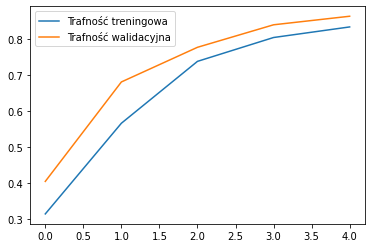

In [ ]:
#???

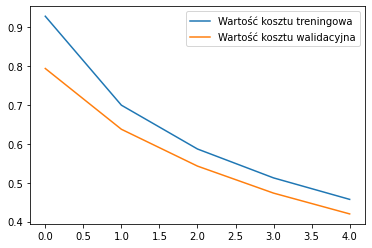

In [ ]:
#???

Ostatnim etapem jest sprawdzenie trafności na zbiorze testowym, przygotowanym wcześniej. Można to osiągnąć za pomocą funkcji <code>model.evaluate(X_test, y_test)</code>, co da nam wyniki funkcji kosztu i metryk dla zbioru testowego.

<div class='alert alert-block alert-warning'>
    <b>Zadanie</b>: przerprowdź ewaluację modelu na danych testowych.
</div>

In [ ]:
#???

32/32 [==============================] - 0s 6ms/step - loss: 0.4196 - accuracy: 0.8530


[0.4195545017719269, 0.8529999852180481]

**WAŻNE**

Predykcji za pomocą modelu można dokonywać na kilka sposobów:

1. Funkcja `model.predict(X)` zwróci wynik będący typem `np.array`, zgodny z ilością neuronów i funkcją aktywacji ostatniej warstwy. Ta opcja **NIE ZACHOWUJE GRADIENTÓW** - nie można z jej pomocą szkolić modelu. Przykładowo:
    1. Jeśli w ostatniej warstwie jest 1 neuron, wynik będzie wektorem `N x 1`, gdzie N to liczba obserwacji.
    2. Jeśli w ostatniej warstwie jest więcej niż 1 neuron (K neuronów), wynik będzie wektorem `N x K`.
    3. Jeśli w ostatniej warstwie jest więcej niż 1 neuron (K neuronów),a funkcją aktywacji jest `softmax` - model zwróci macierz `N x K`, gdzie każdy element wiersza będzie prawdopodobieństwem przynależności do klasy. Aby uzyskać numer klasy o maksymalnym prawdopodobieństwie należy użyć funkcji `.argmax(axis=1)`. Całość wygląda wtedy następująco:
```
probabilities = model.predict(X)
max_class = probabilities.argmax(axis=1)
```

2. Można wywołać funkcję `model(X)`, która robi **prawie** to samo, co predict, z tą różnicą że nie ustawia niektórych szczególnych cech modelu w tryb predyckji (np. dropout). Predykcje modelu mogą być wtedy niedeterministyczne. **TYLKO TA OPCJA PREDYKCJI ZACHOWUJE GRADIENTY** - jeśli chcemy szkolić model i wykonywać wsteczną propagację, musimy używać tej metody.

# Inne eksperymenty

Spróbuj zmienić strukturę sieci, dodać kolejne warstwy, zmienić liczbę neuronów, etc. - sprawdź, czy przyniesie to lepsze rezultaty niż dotąd.

In [ ]:
#???

Epoch 1/5
100/100 [==============================] - 1s 5ms/step - loss: 0.6393 - accuracy: 0.6197 - val_loss: 0.5386 - val_accuracy: 0.7987
Epoch 2/5
100/100 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8159 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 3/5
100/100 [==============================] - 0s 5ms/step - loss: 0.3685 - accuracy: 0.8669 - val_loss: 0.2919 - val_accuracy: 0.8950
Epoch 4/5
100/100 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8806 - val_loss: 0.2728 - val_accuracy: 0.9013
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8840
[0.2812312841415405, 0.8840000033378601]


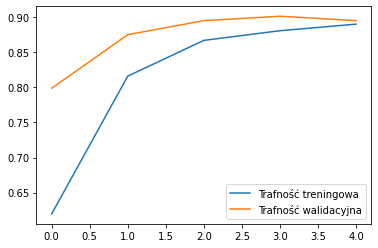

In [ ]:
#???

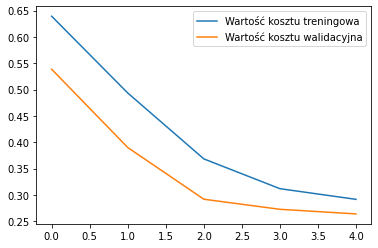

In [ ]:
plt.plot(history3.history['loss'], label='Wartość kosztu treningowa')
plt.plot(history3.history['val_loss'], label='Wartość kosztu walidacyjna')
plt.legend()
plt.show()